In [105]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from random import randint
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Análisis exploratorio del dataframe de tags (con gráficos)

Viendo un vistazo rápido a lo obtenido, parece tener sentido la correlación altamente positiva
entre dichos tags, dado que los tags aluden a conceptos similares o muy relacionados intrínsecamente.

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


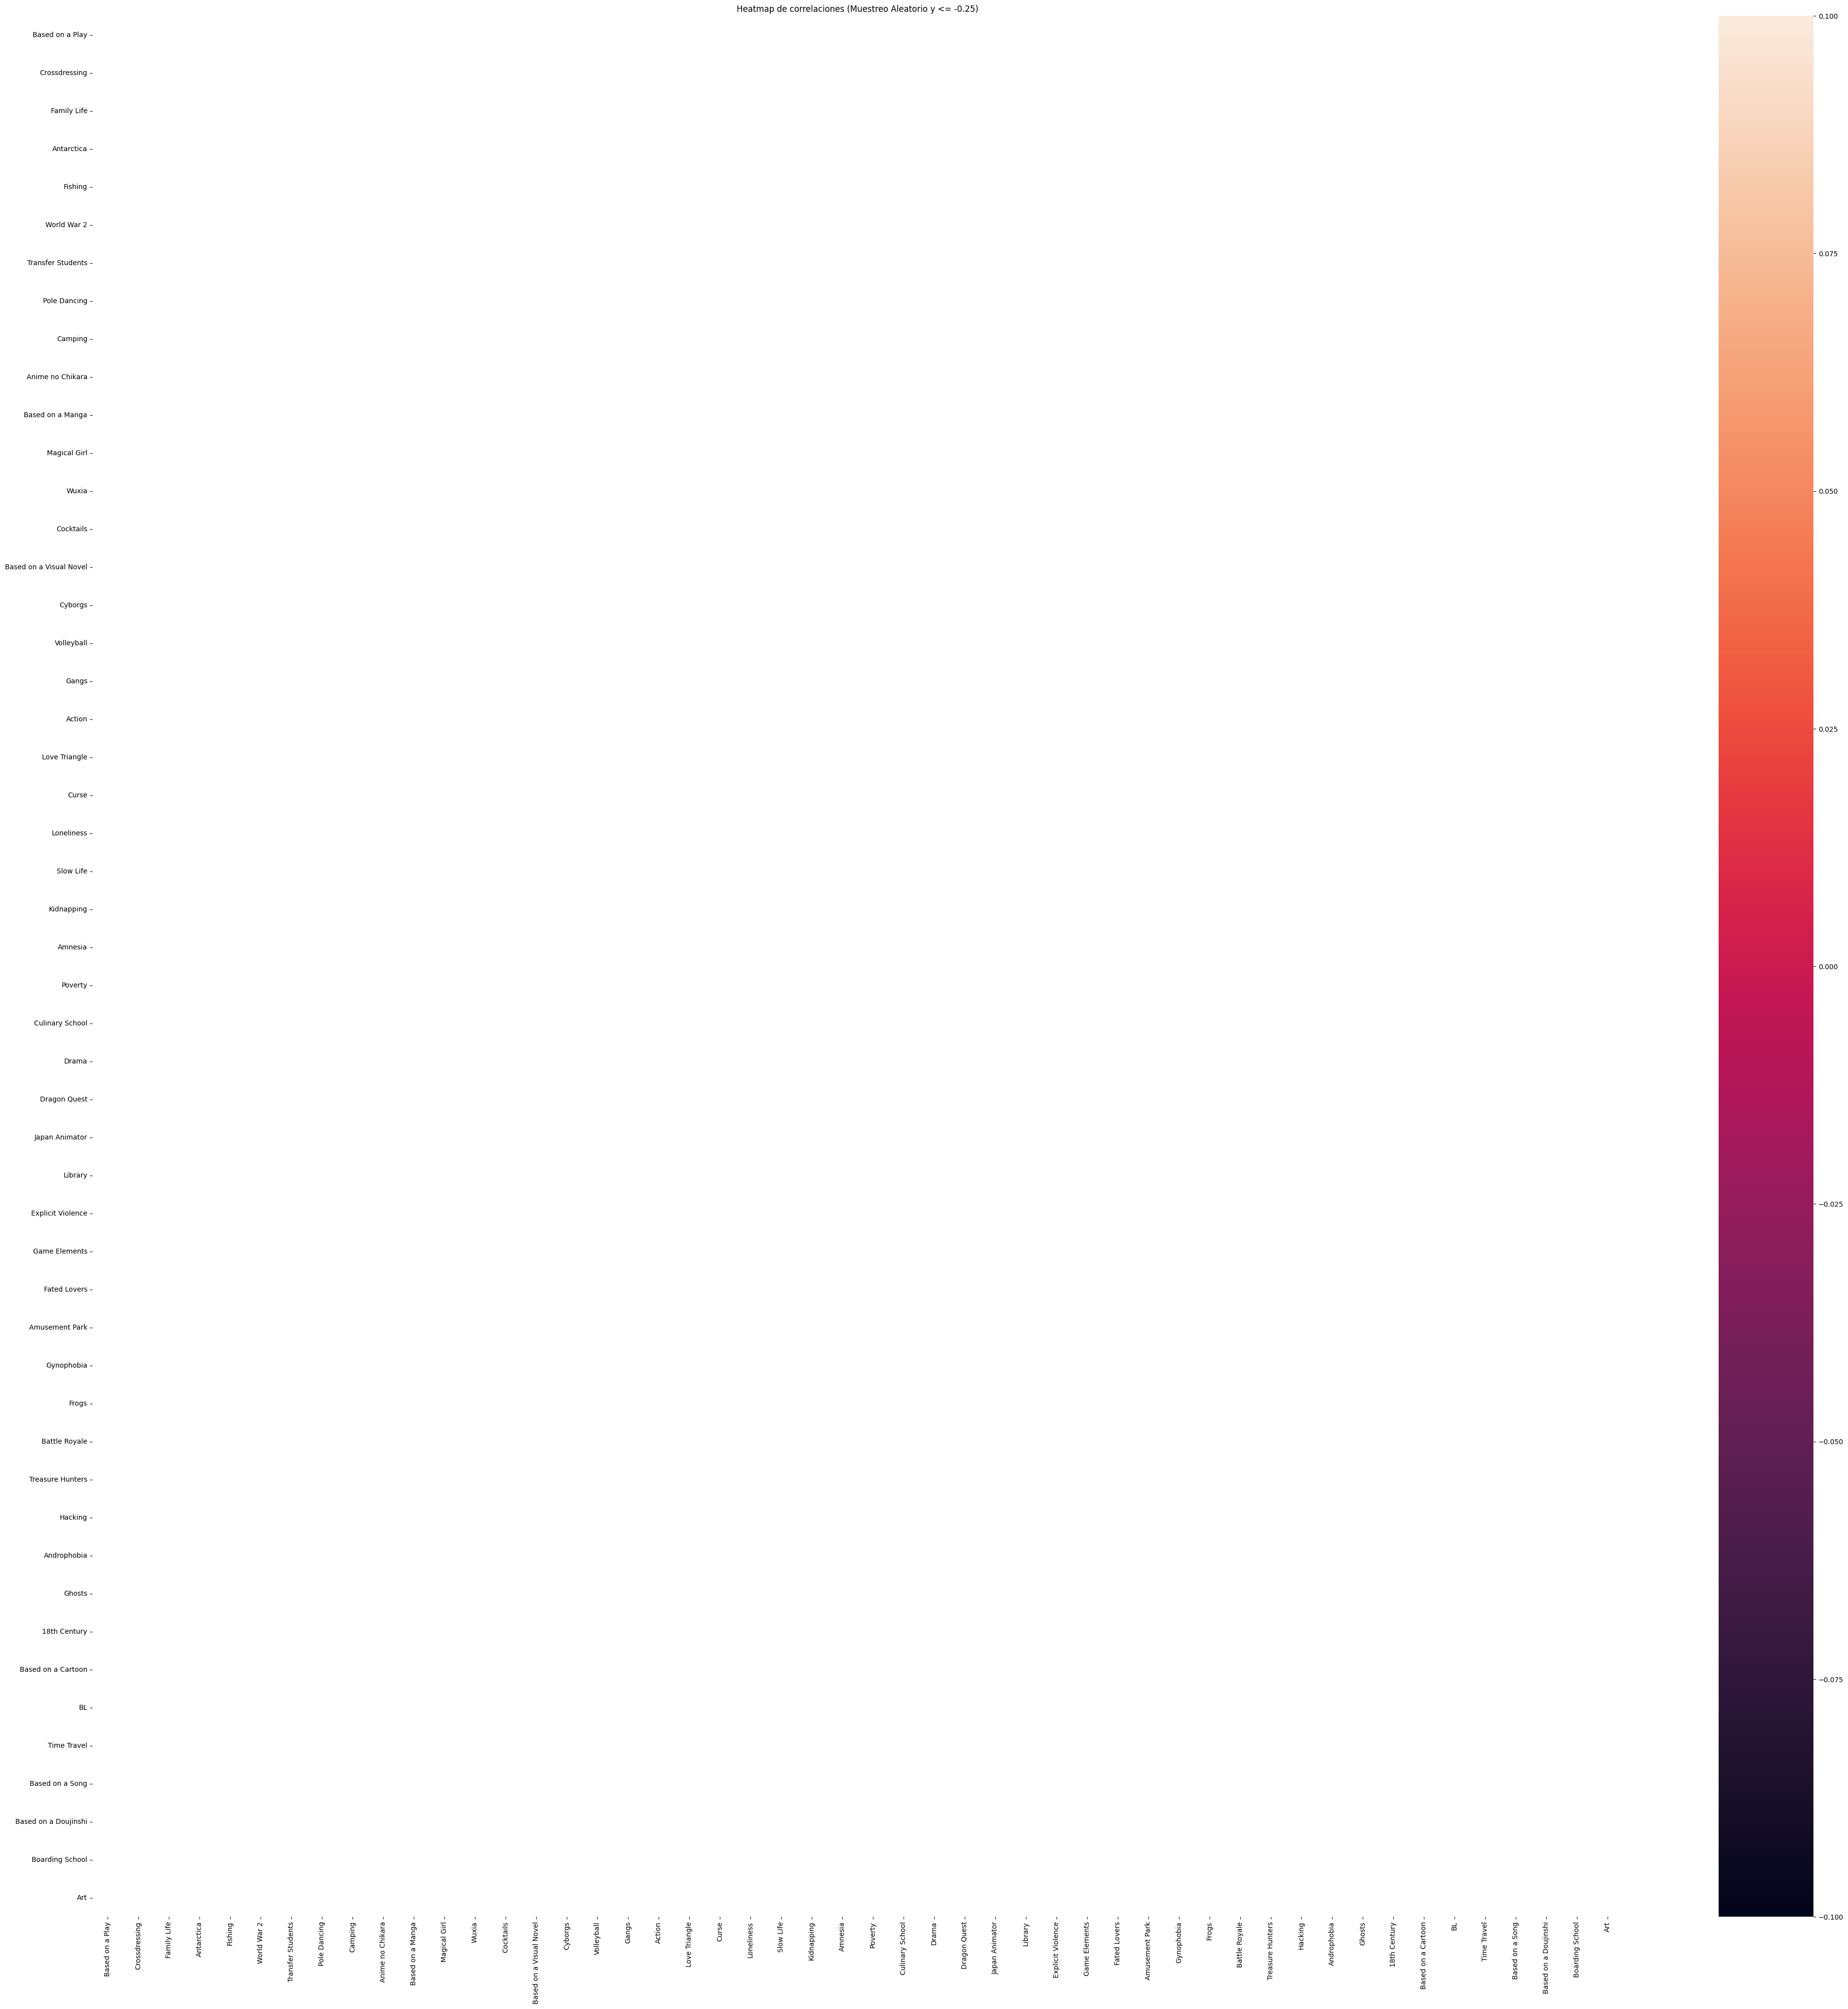

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


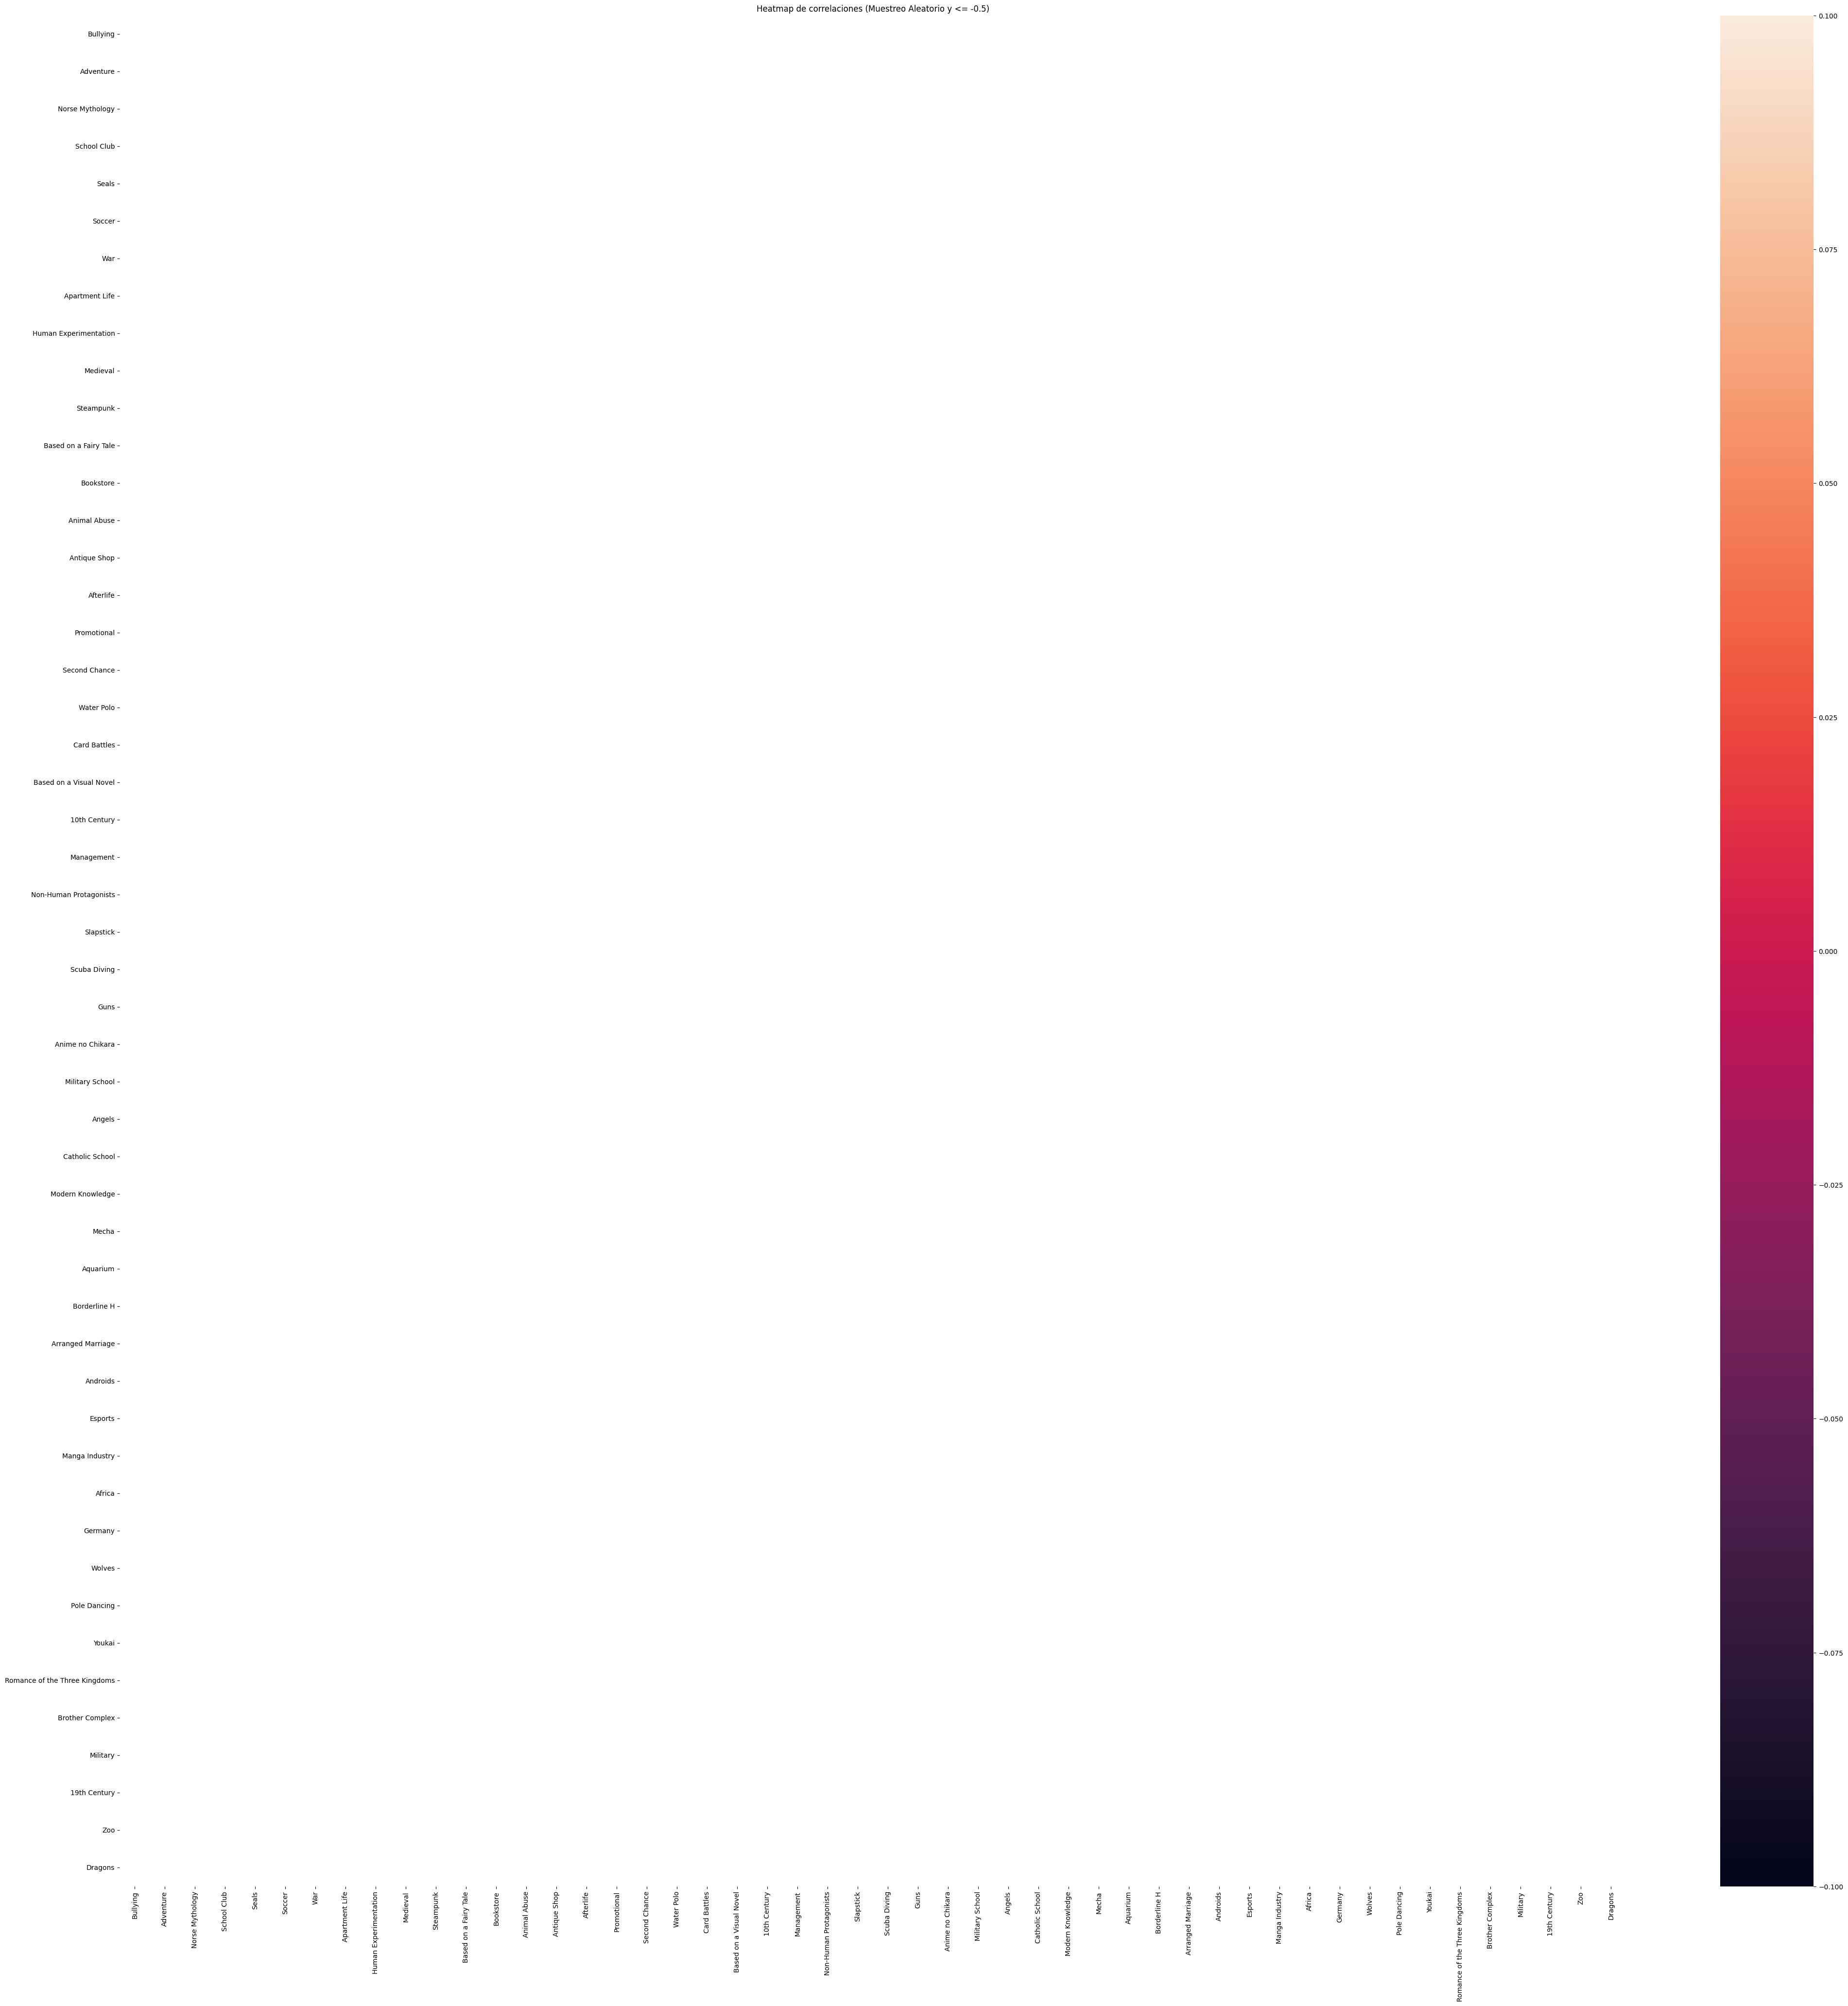

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


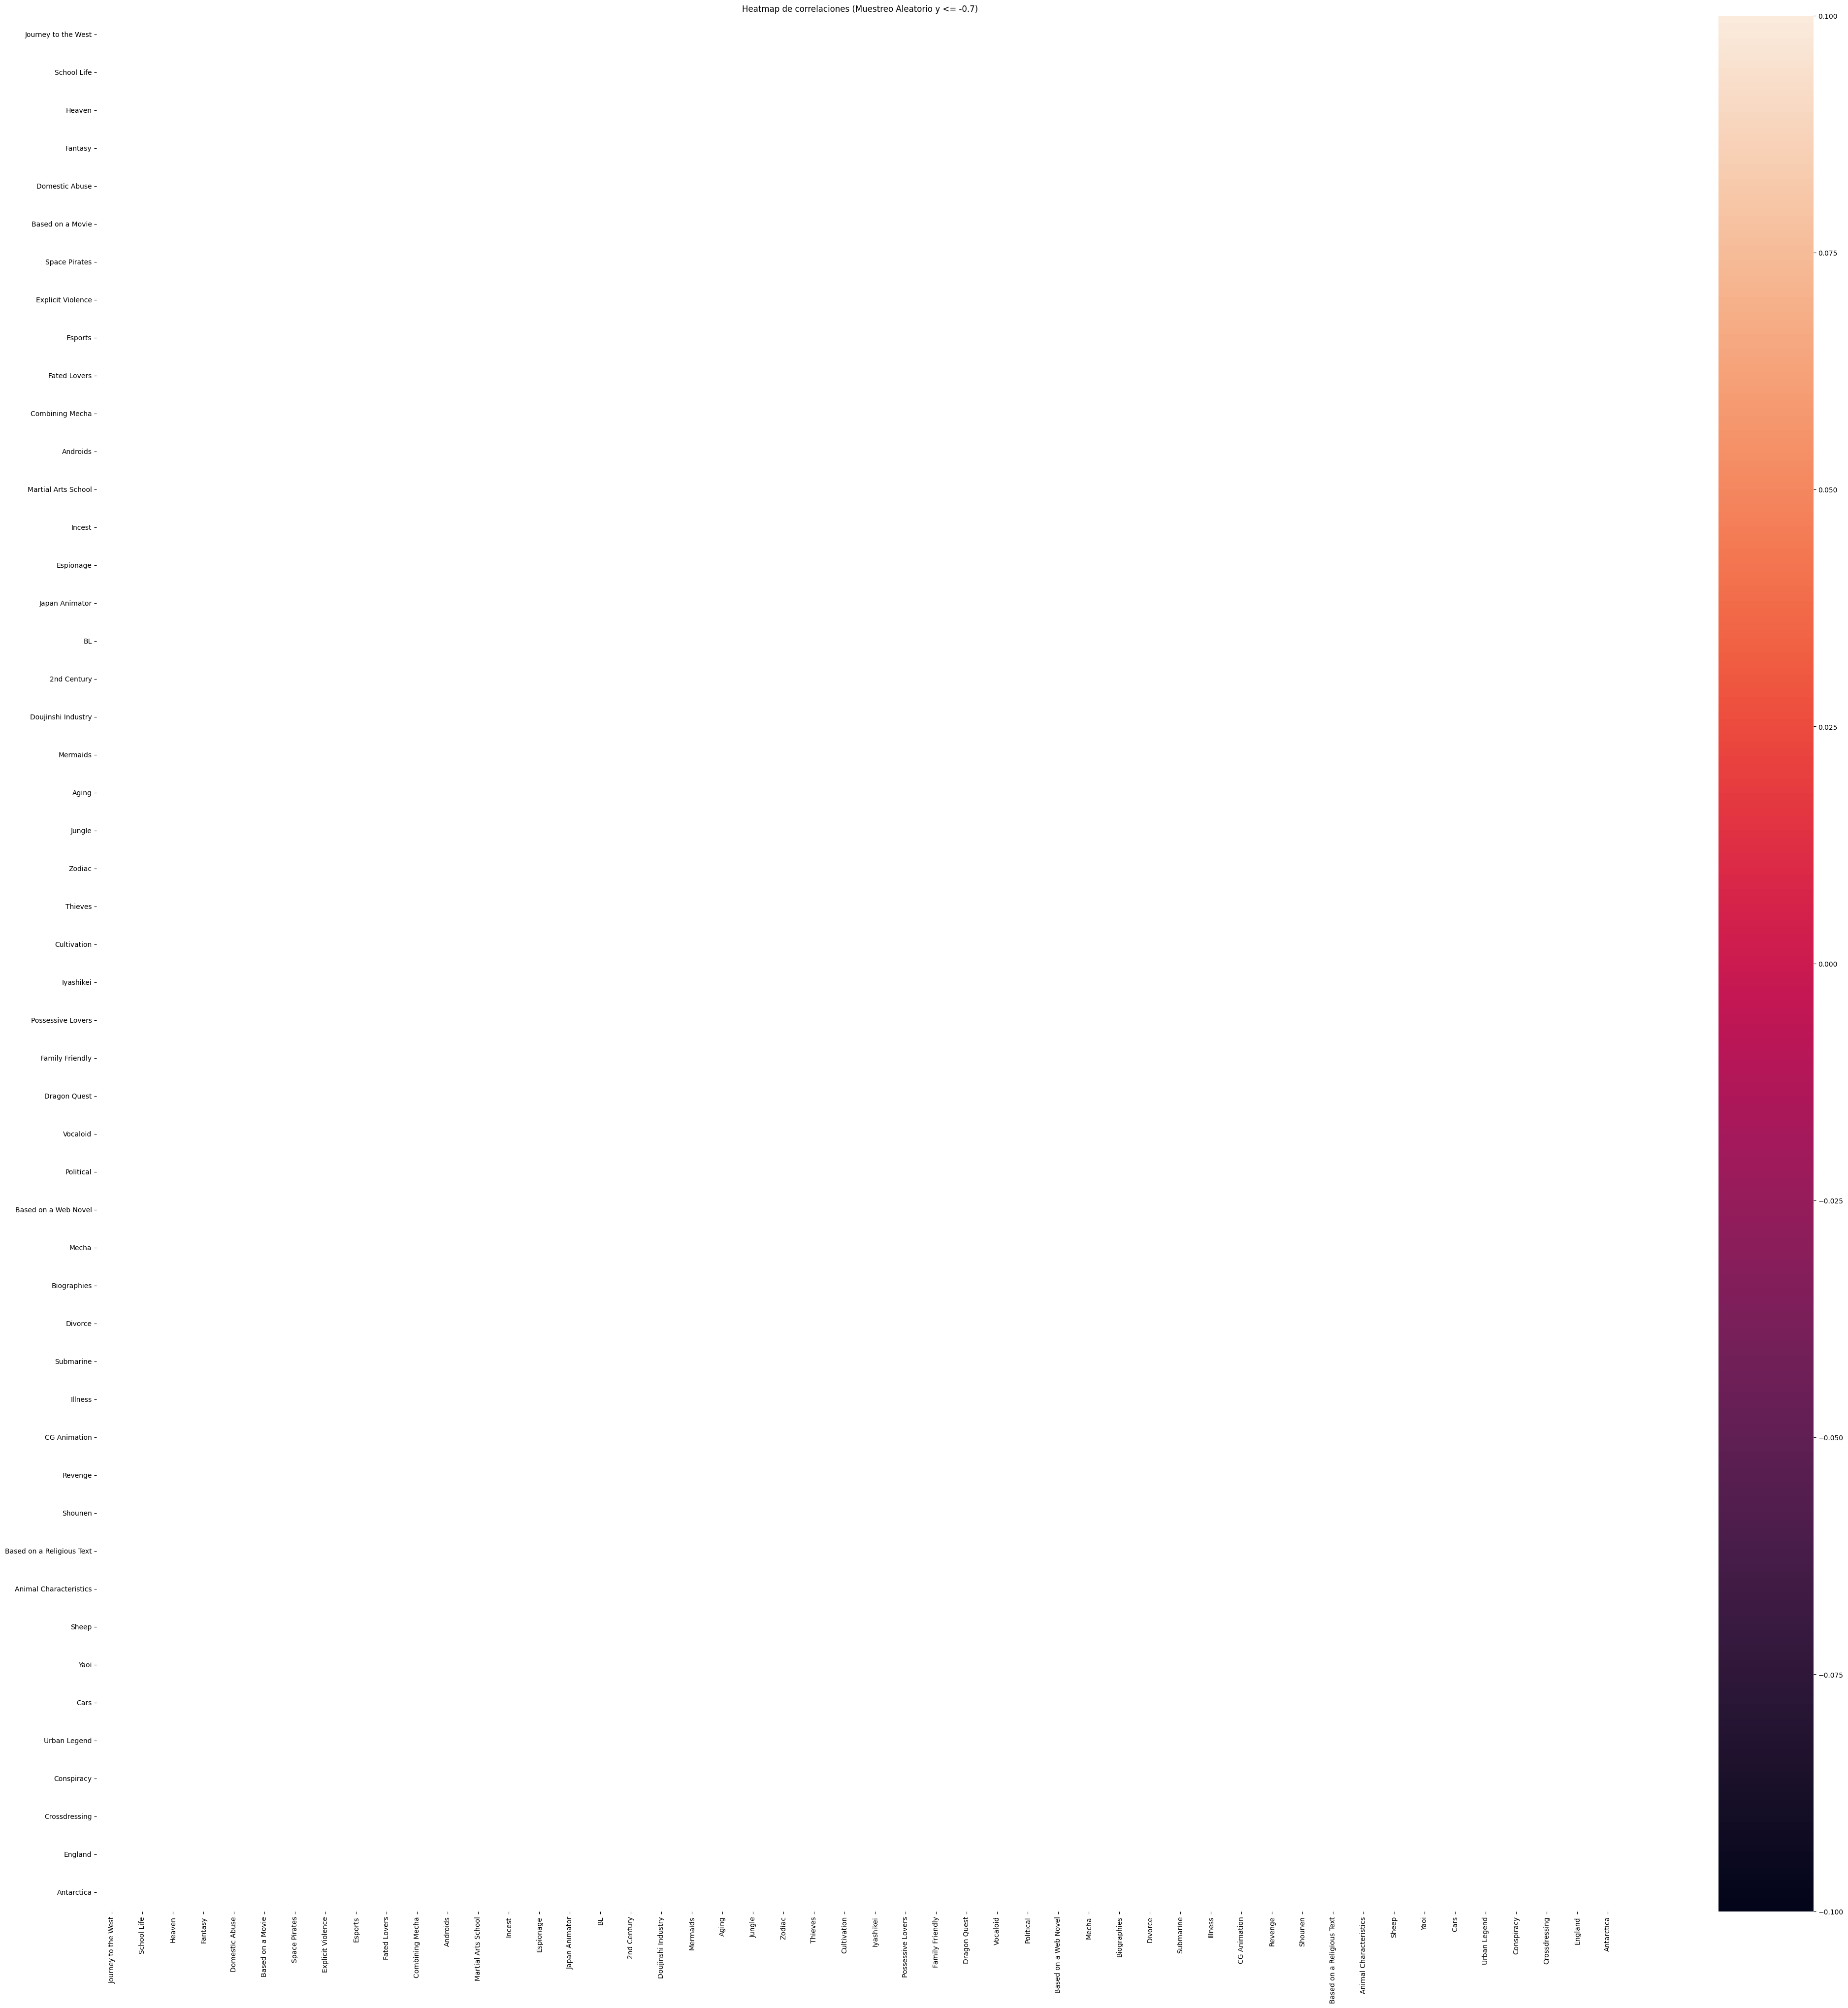

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


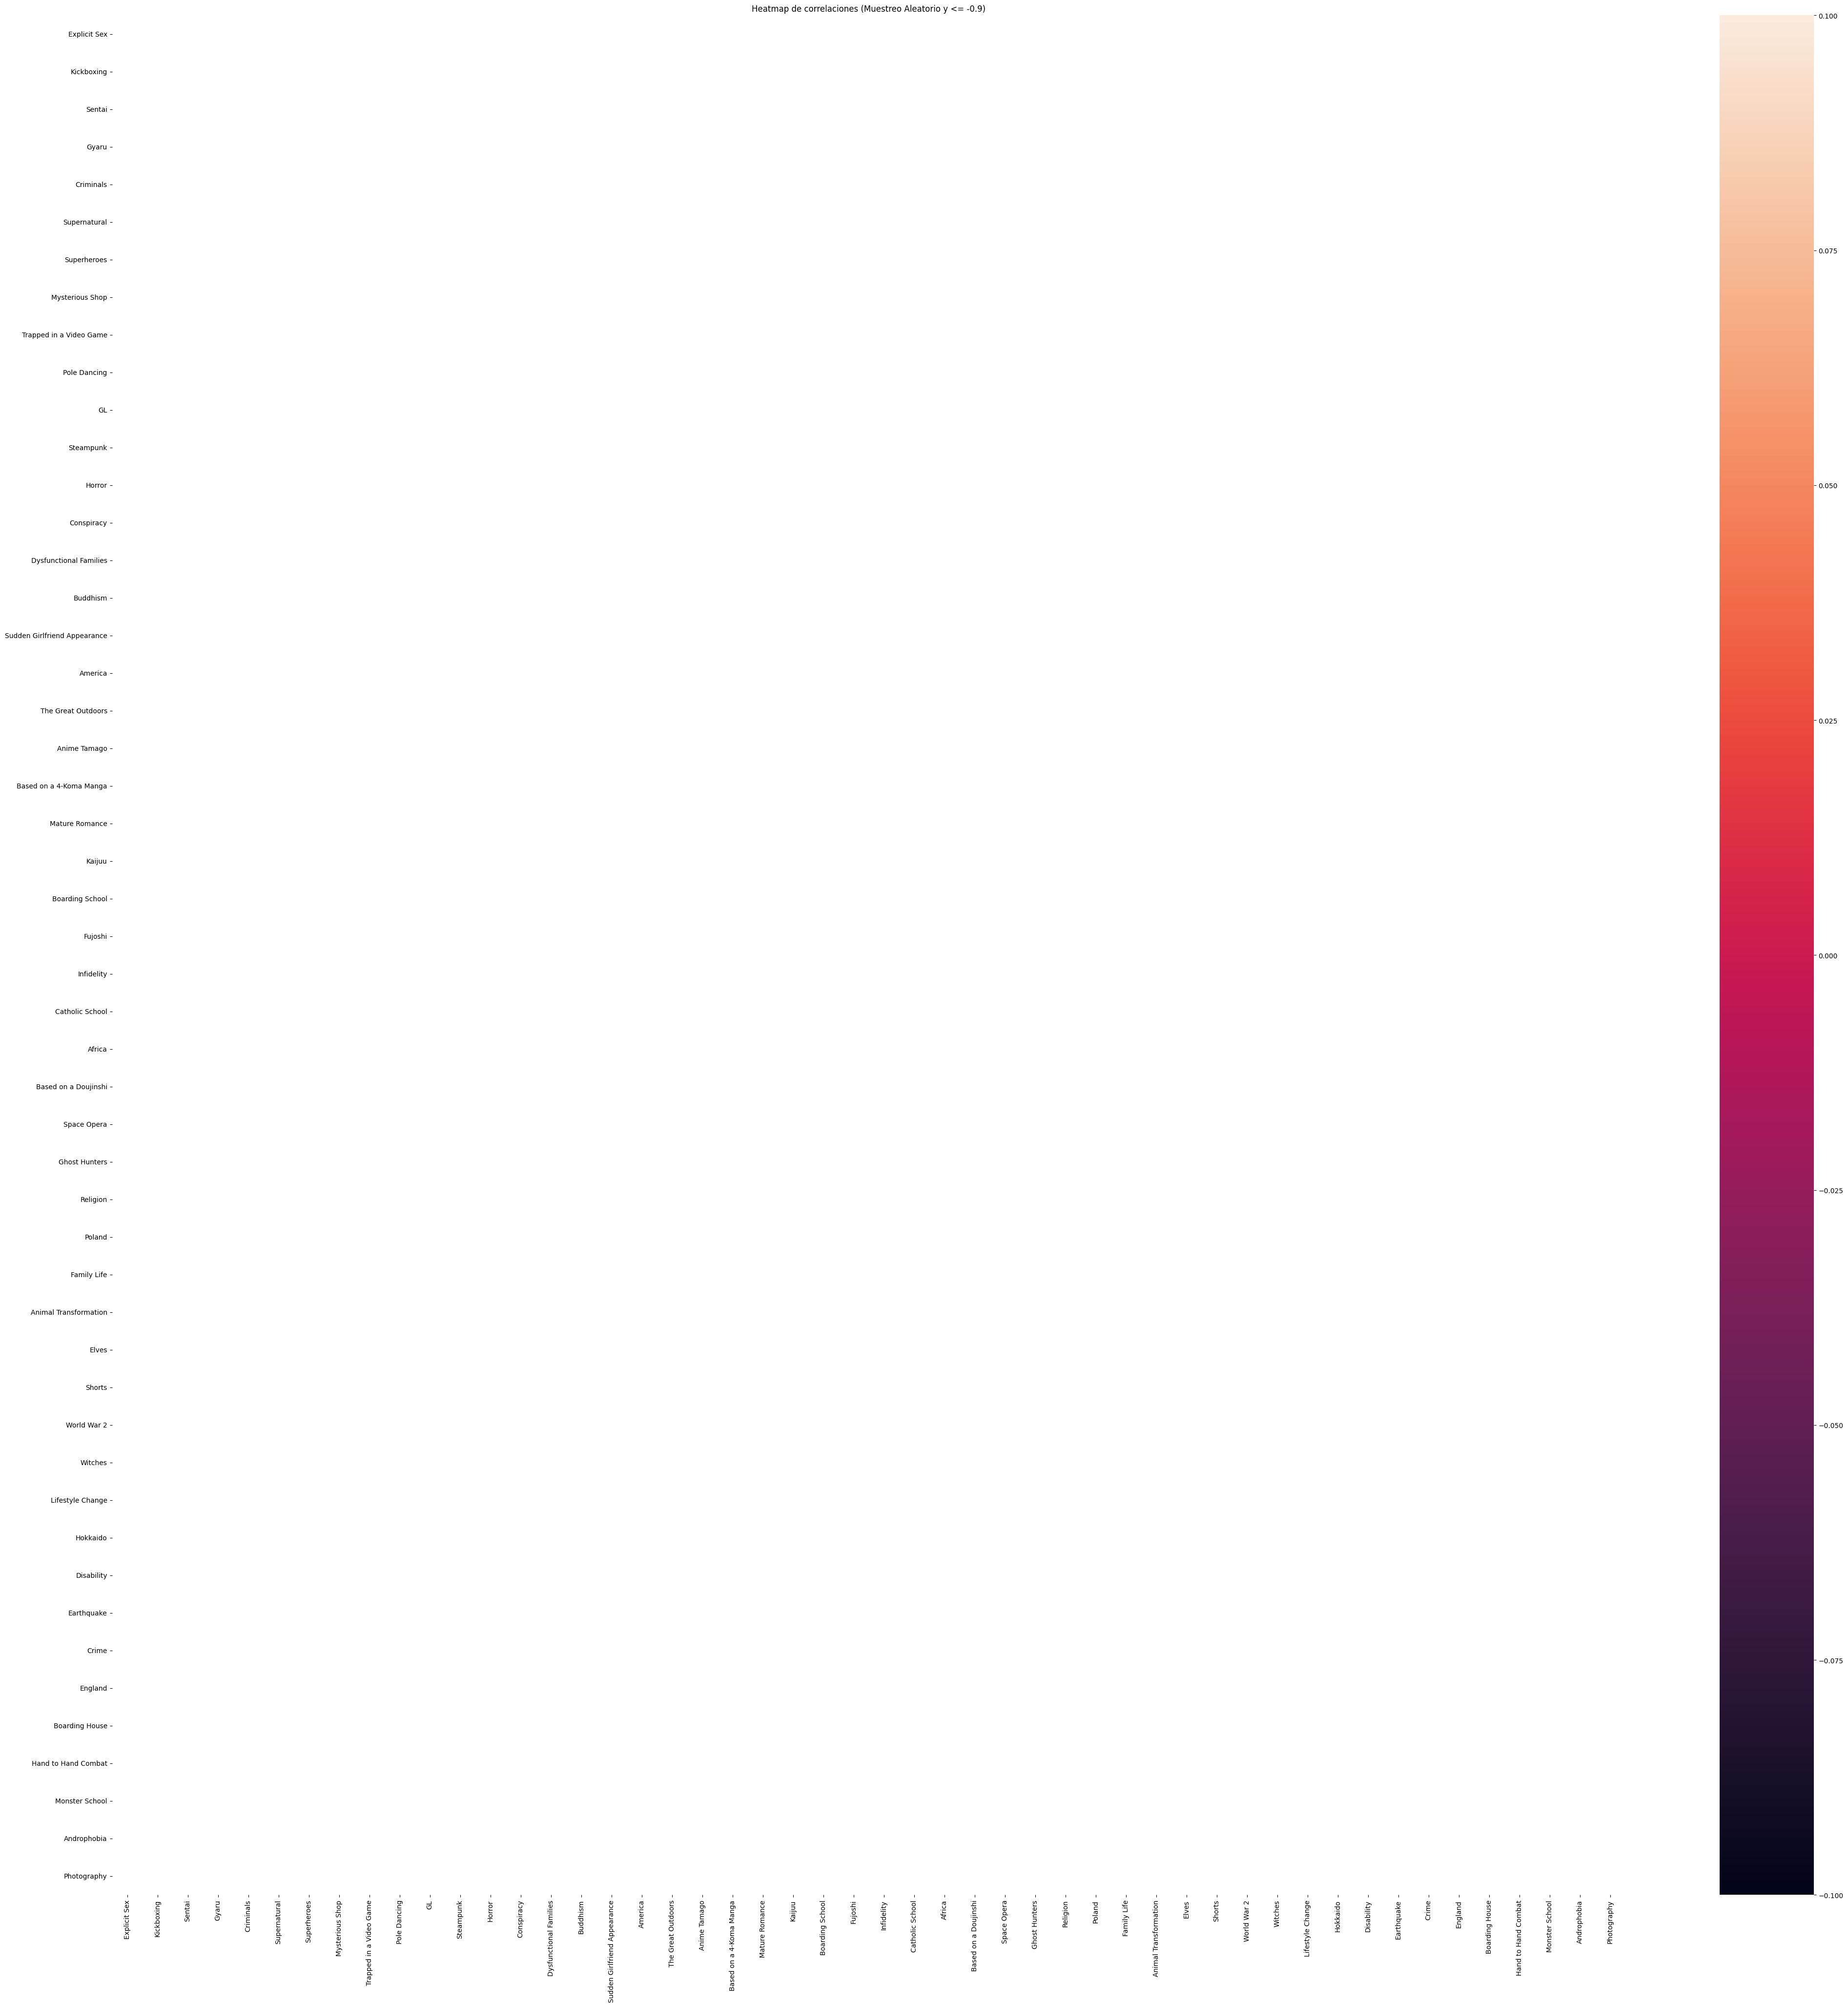

c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mativ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


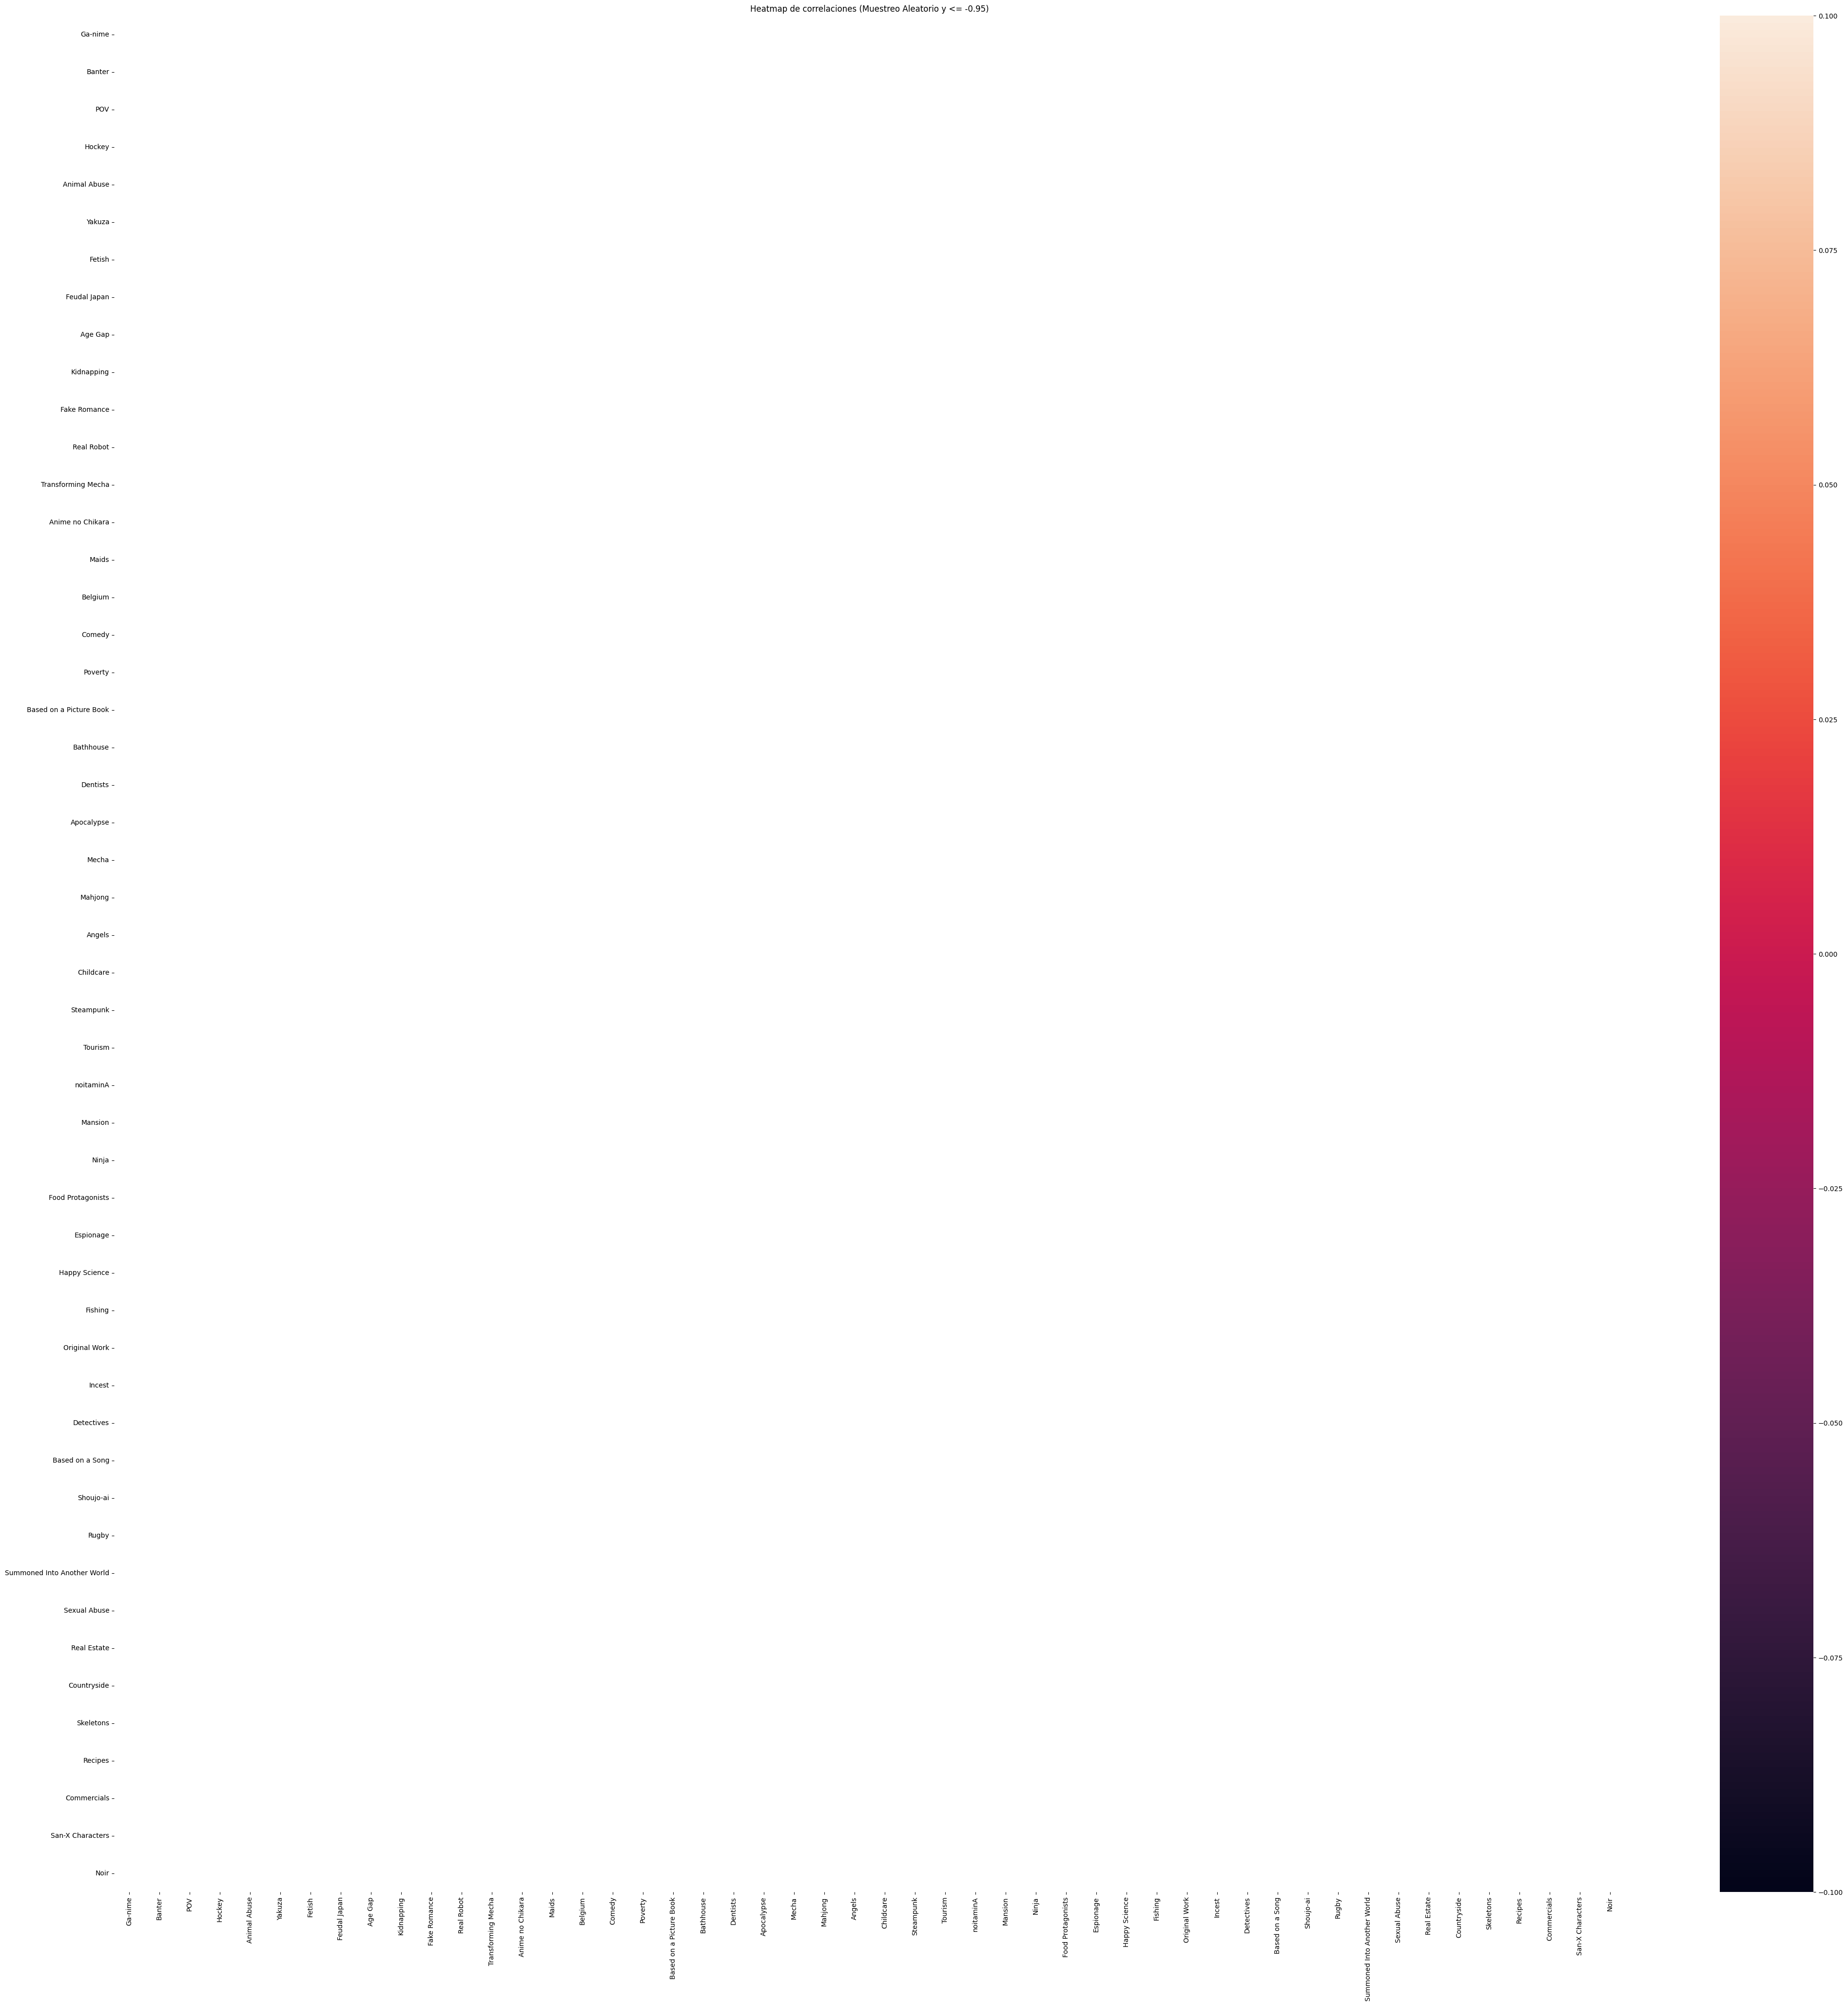

In [173]:
# Ahora, lo mismo de los heatmaps, pero viendo correlacciones negativas. De la misma forma, pero
# usando valores de correlacción negativos.

# Número máximo de columnas a mostrar en el heatmap
max_columns_to_show = 50

# Lista de valores de correlación a considerar
corr_values_to_show = [-0.25, -0.5, -0.7, -0.9, -0.95]

for corr_value in corr_values_to_show:
    # Seleccionar un subconjunto aleatorio de columnas
    random_columns = random.sample(
        tags_animes.columns.tolist(),
        k=min(max_columns_to_show, len(tags_animes.columns)),
    )

    # Crear el subset de correlaciones
    corr_subset = tags_animes[random_columns].corr()

    # Filtrar solo las correlaciones que son <= al valor de correlación deseado
    corr_subset = corr_subset[corr_subset.abs() <= corr_value]

    # Eliminar la diagonal estableciéndola a NaN
    np.fill_diagonal(corr_subset.values, np.nan)

    # Obtener el número de filas y columnas del subset
    rows, cols = corr_subset.shape

    # Crear el subplot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Crear el heatmap
    sns.heatmap(corr_subset, annot=True, ax=ax)

    # Ponerle título al heatmap
    ax.set_title(f"Heatmap de correlaciones (Muestreo Aleatorio y <= {corr_value})")

    # Mostrar el heatmap
    plt.show()

In [174]:
# En específico, imprimir las correlaciones <= -0.95, que no sean con el mismo tag (diagonal).

corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.95]

print("Correlaciones <= -0.95:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}")

Correlaciones <= -0.95:


Como no se halló nada, ampliemos la brecha.

In [111]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.75]

print("Correlaciones <= -0.75:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.75:


Ampliemos la brecha aún más.

In [113]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.5]

print("Correlaciones <= -0.5:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.5:


Ampliemos la brecha una última vez.

In [175]:
corr_subset = tags_animes.corr()[tags_animes.corr() <= -0.25]

print("Correlaciones <= -0.25:")

for col in corr_subset.columns:
    for row in corr_subset.index:
        if col != row and not np.isnan(corr_subset.loc[row, col]):
            print(
                f"\t{row} y {col} tienen una correlación de {corr_subset.loc[row, col]}"
            )

Correlaciones <= -0.25:
	Original Work y Based on a Manga tienen una correlación de -0.3515390637899467
	Based on a Manga y Original Work tienen una correlación de -0.3515390637899467


No parecen existir correlaciones negativas muy significativas entre los tags, aunque la hallada con
un valor aprox de -0.35 tiene bastante sentido lógico.

Ello, porque que un anime sea "Original Work" se opone a que sea "Based on a Manga", y viceversa,
puesto que explican cosas opuestas. El primer tag habla sobre una creación original, mientras que
el segundo sobre una adaptación de un manga. 

Lo coherente es observar que un anime no puede ser ambas cosas a la vez (no ser puede estar basado
y al mismo ser original), por lo que es lógico que
exista cierta correlación negativa entre ambos tags.

In [176]:
# Columna útil para los gráficos siguientes

tags_animes["Cantidad de Tags"] = tags_animes.sum(axis=1)

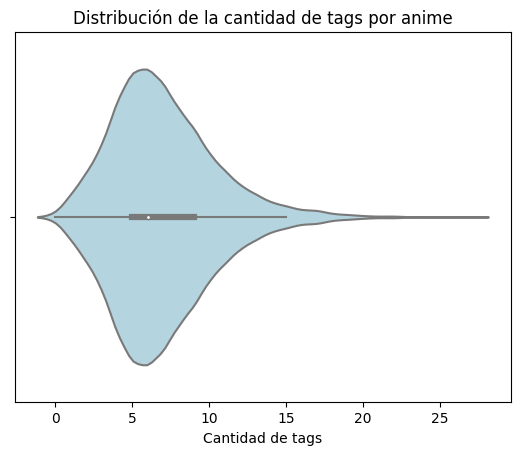

In [177]:
# Violin plot de la cantidad de tags por anime

# Crea un Violin Plot


sns.violinplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Etiqueta del eje x
plt.xlabel("Cantidad de tags")

# Título del gráfico
plt.title("Distribución de la cantidad de tags por anime")

# Mostrar el gráfico
plt.show()

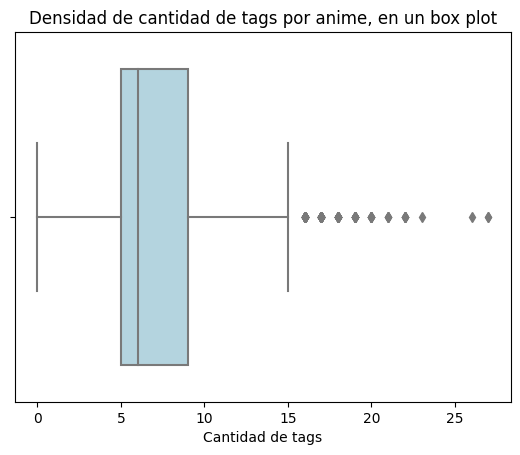

In [178]:
# Box plot de la cantidad de tags por anime

sns.boxplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Label del eje x
plt.xlabel("Cantidad de tags")

# Título del gráfico

plt.title("Densidad de cantidad de tags por anime, en un box plot")

# Mostrar el gráfico

plt.show()

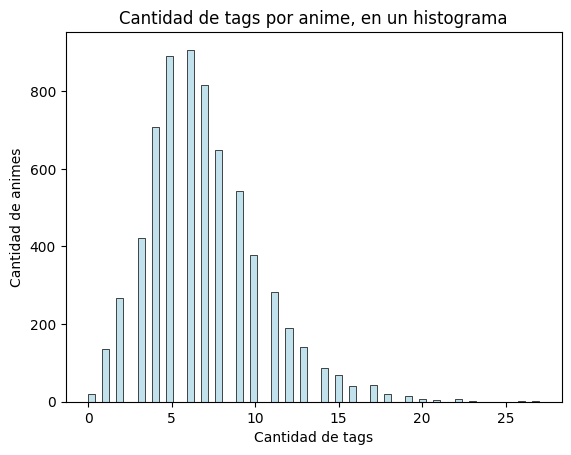

In [179]:
# Histograma que muestra la cantidad de tags por anime

sns.histplot(x=tags_animes["Cantidad de Tags"], color="lightblue")

# Label del eje x
plt.xlabel("Cantidad de tags")

# Label del eje y
plt.ylabel("Cantidad de animes")

# Título del gráfico

plt.title("Cantidad de tags por anime, en un histograma")

# Mostrar el gráfico

plt.show()

Text(0.5, 1.0, 'Medidas de tendencia de la cantidad de tags por anime')

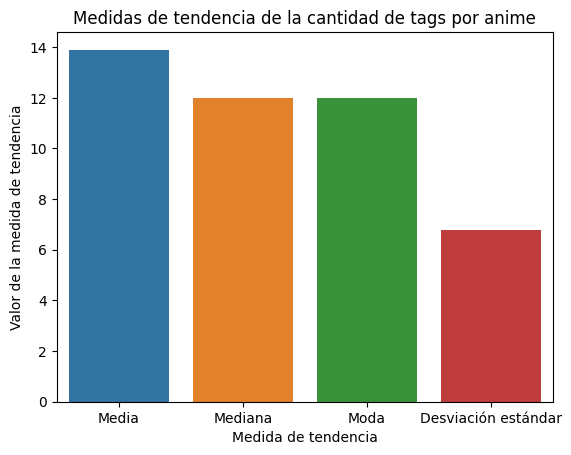

In [183]:
# Distribución en un gráfico de barras sobre distintas medidas de tendencia de la cantidad de tags
# por anime (media, mediana, moda, desviación estándar)

# Obtener la media, mediana, moda y desviación estándar de la cantidad de tags por anime

mean = tags_animes.sum(axis=1).mean()
median = tags_animes.sum(axis=1).median()
mode = tags_animes.sum(axis=1).mode()[0]
std = tags_animes.sum(axis=1).std()

# Crear el gráfico de barras

sns.barplot(x=["Media", "Mediana", "Moda", "Desviación estándar"], y=[mean, median, mode, std])

# Label del eje x

plt.xlabel("Medida de tendencia")

# Label del eje y

plt.ylabel("Valor de la medida de tendencia")

# Título del gráfico

plt.title("Medidas de tendencia de la cantidad de tags por anime")

In [184]:
print(f"Se obtuvo una media de {mean}, una mediana de {median}, una moda de {mode} y una desviación estándar de {std}. Si comparamos los valores, tenemos lo siguiente:")

if mean > median:
    print("\tLa media es mayor que la mediana")
elif mean < median:
    print("\tLa media es menor que la mediana")
if mean > mode:
    print("\tLa media es mayor que la moda")
elif mean < mode:
    print("\tLa media es menor que la moda")
if mean > std:
    print("\tLa media es mayor que la desviación estándar")
elif mean < std:
    print("\tLa media es menor que la desviación estándar")
if median > mode:
    print("\tLa mediana es mayor que la moda")
elif median < mode:
    print("\tLa mediana es menor que la moda")
if median > std:
    print("\tLa mediana es mayor que la desviación estándar")
elif median < std:
    print("\tLa mediana es menor que la desviación estándar")
if mode > std:
    print("\tLa moda es mayor que la desviación estándar")
elif mode < std:
    print("\tLa moda es menor que la desviación estándar")
    

Se obtuvo una media de 13.899157134256471, una mediana de 12.0, una moda de 12 y una desviación estándar de 6.77796097452205. Si comparamos los valores, tenemos lo siguiente:
	La media es mayor que la mediana
	La media es mayor que la moda
	La media es mayor que la desviación estándar
	La mediana es mayor que la desviación estándar
	La moda es mayor que la desviación estándar
